<a href="https://colab.research.google.com/github/SanitCoder/Time-Series-Analysis-SOC-24/blob/main/SOC'24_Time_Series_Analysis_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('titanic.csv')


print(df.head())

# Provide a summary of the dataset
print(df.info())
print(df.describe(include='all'))


Saving titanic.csv to titanic (3).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

In [24]:
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns=['Cabin'])


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
df = df.drop_duplicates()

In [26]:

df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')

print(df.dtypes)


PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Embarked         object
dtype: object


In [27]:
print(df.describe())

print(df.describe(include=['category']))


       PassengerId         Age        Fare
count   891.000000  891.000000  891.000000
mean    446.000000   29.361582   32.204208
std     257.353842   13.019697   49.693429
min       1.000000    0.420000    0.000000
25%     223.500000   22.000000    7.910400
50%     446.000000   28.000000   14.454200
75%     668.500000   35.000000   31.000000
max     891.000000   80.000000  512.329200
        Survived  Pclass  SibSp  Parch
count        891     891    891    891
unique         2       3      7      7
top            0       3      0      0
freq         549     491    608    678


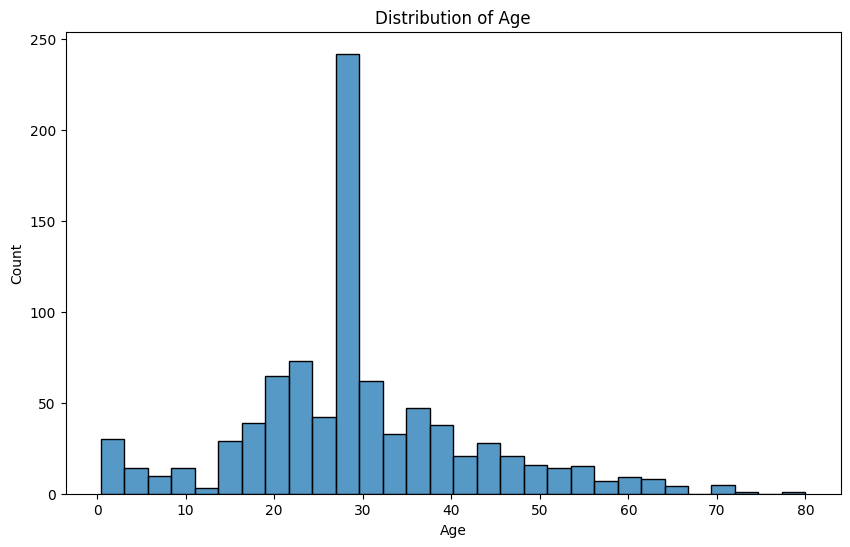

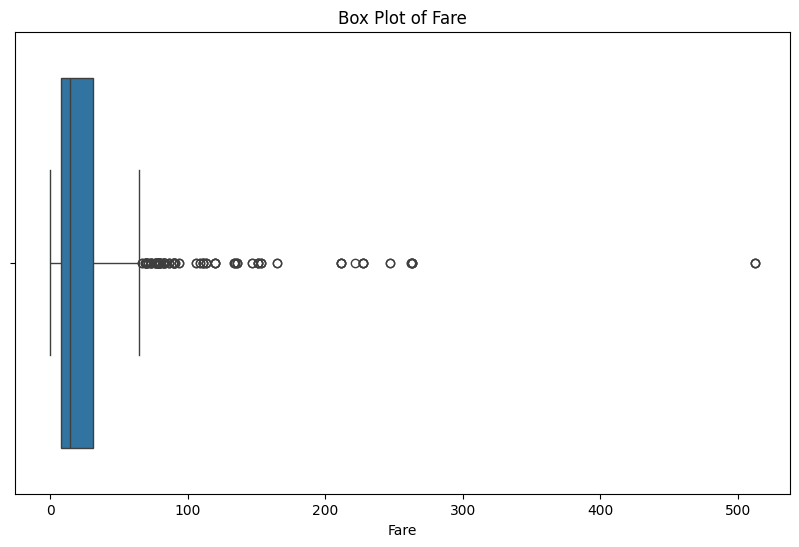

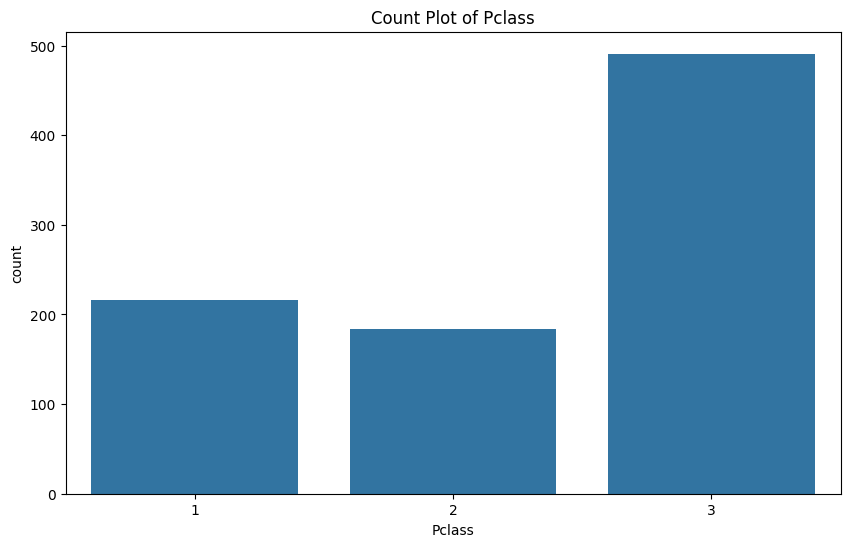

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Pclass'])
plt.title('Count Plot of Pclass')
plt.show()


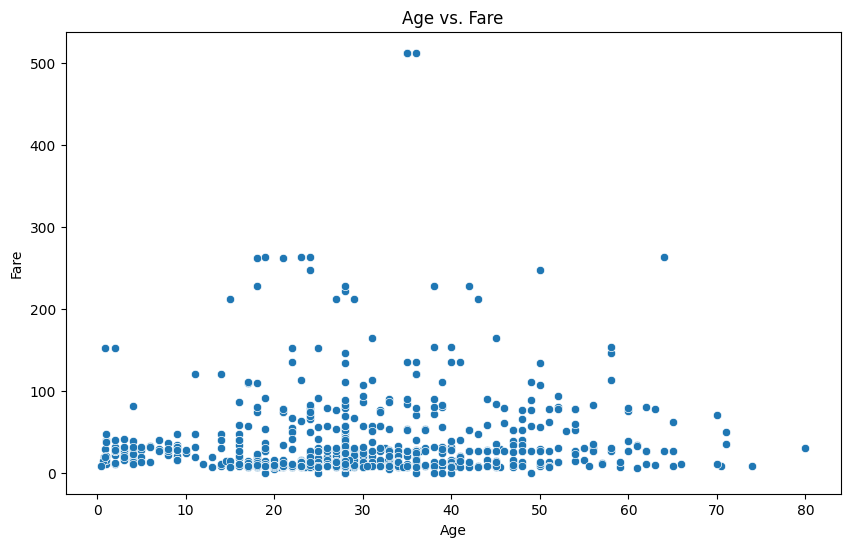

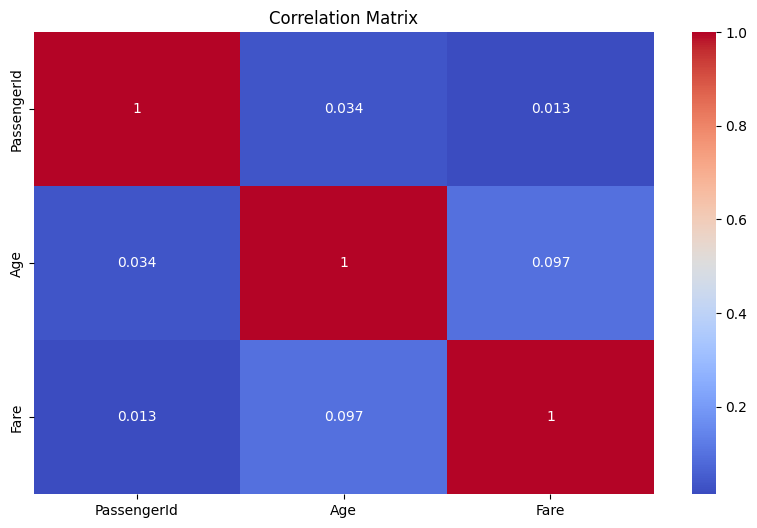

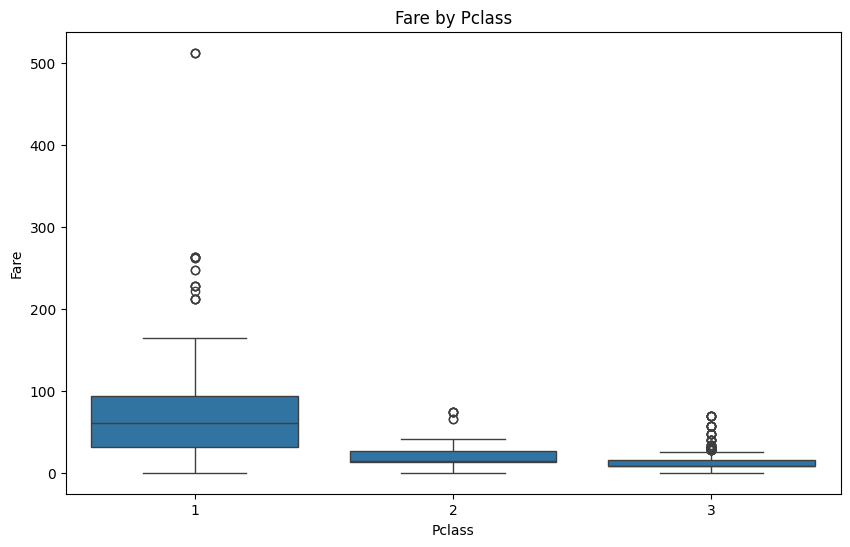

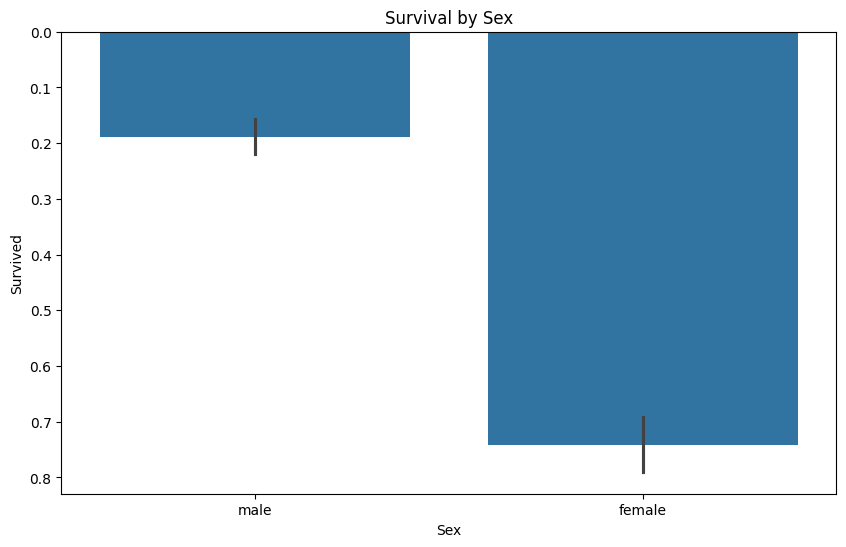

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs. Fare')
plt.show()

numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Pclass')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival by Sex')
plt.show()



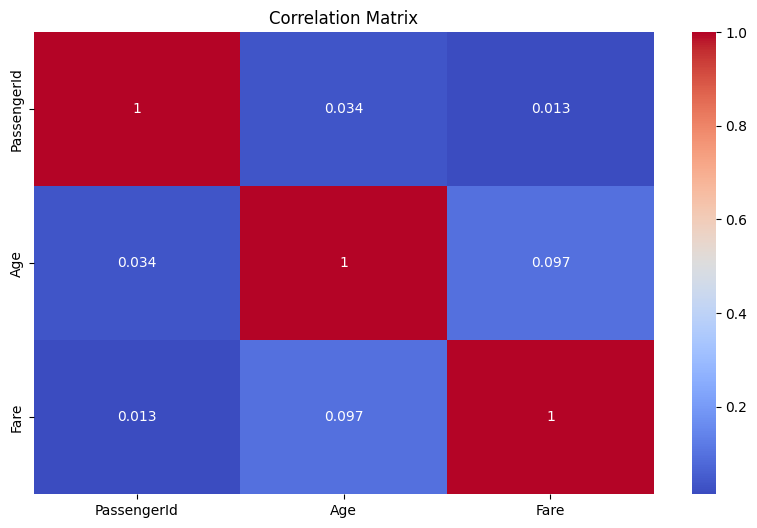

In [32]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
